## Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
columns = df.columns
for x in columns:
    print(x)
    print(df[x].value_counts())
    print()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

sex
1    207
0     96
Name: sex, dtype: int64

cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200  

## Preprocessing the dataset

#### sex

In [10]:
sex_list = []

for v in df['sex']:
    sex_list.append(v)
    
for i,v in enumerate(sex_list):
    if v==0:
        sex_list[i] = True
    else:
        sex_list[i] = False

df['sex']=sex_list

#### exng

In [11]:
exng_list = []

for v in df['exng']:
    exng_list.append(v)

for i,v in enumerate(exng_list):
    if v==1:
        exng_list[i] = True
    else:
        exng_list[i] = False
        
df['exng'] = exng_list

In [12]:
fbs_list = []

for v in df['fbs']:
    fbs_list.append(v)

for i,v in enumerate(fbs_list):
    if v==1:
        fbs_list[i] = True
    else:
        fbs_list[i] = False

df['fbs']=fbs_list

In [14]:
output_list = []

for v in df['output']:
    output_list.append(v)

for i,v in enumerate(output_list):
    if v==1:
        output_list[i] = True
    else:
        output_list[i] = False

df['output']=output_list

In [15]:
columns = df.columns
for x in columns:
    print(x)
    print(df[x].value_counts())
    print()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

sex
False    207
True      96
Name: sex, dtype: int64

cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123    

## Creation of new attributes

In [17]:
df['sex_is_male']=df['sex']
df['heart_attack_chances'] = df['output']

df.drop(columns=['sex', 'output'], inplace=True)

## Exploratory data analysis

In [18]:
df.columns

Index(['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'sex_is_male',
       'heart_attack_chances'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

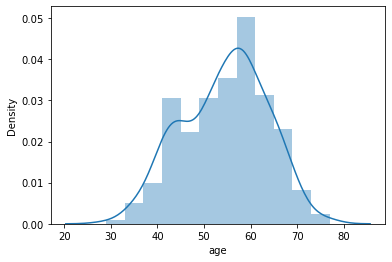

In [20]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='cp'>

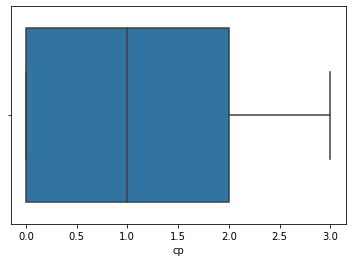

In [21]:
sns.boxplot(df['cp'])

<AxesSubplot:xlabel='cp', ylabel='count'>

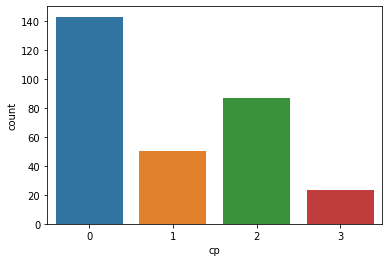

In [22]:
sns.countplot(df['cp'])

<AxesSubplot:xlabel='chol', ylabel='Density'>

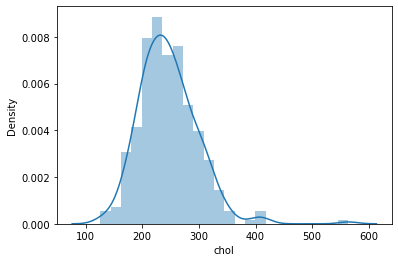

In [24]:
sns.distplot(df['chol'])

<AxesSubplot:xlabel='age', ylabel='thalachh'>

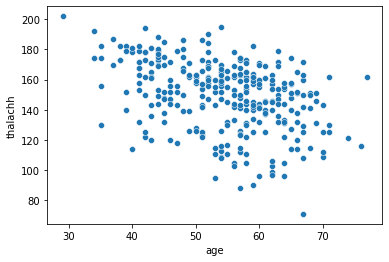

In [30]:
sns.scatterplot(x=df['age'], y=df['thalachh'])

## Correlation Matrix

<AxesSubplot:>

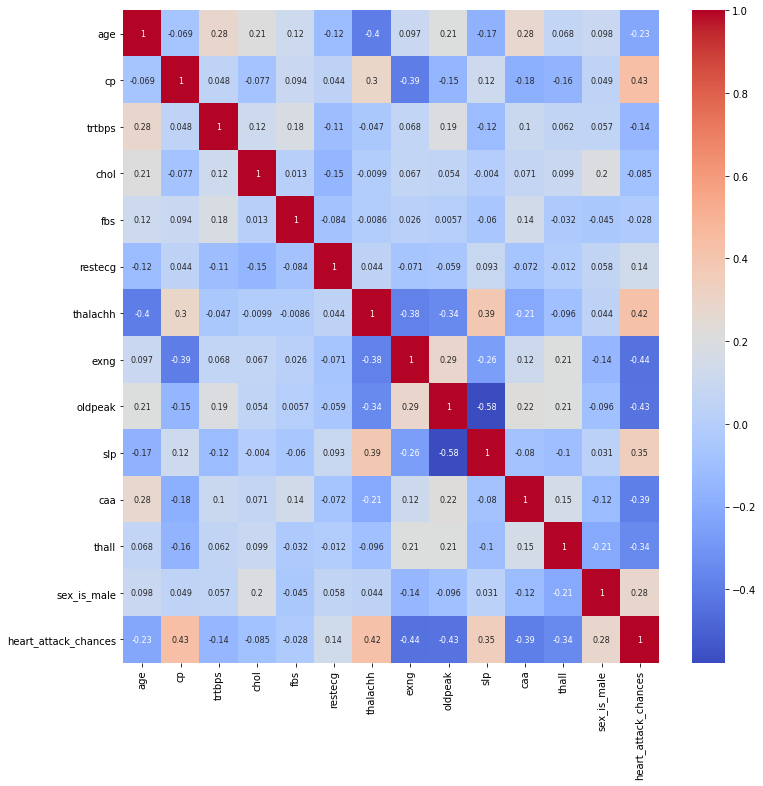

In [35]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 8})

## Onehot Encoding

In [37]:
columns = df.columns
for col in columns:
    print(col)
    print(df[col].value_counts())
    print()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

chol
234    6


In [38]:
df = pd.get_dummies(df, columns=['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'sex_is_male'])
df.head()

,age,trtbps,chol,thalachh,oldpeak,heart_attack_chances,cp_0,cp_1,cp_2,cp_3,...,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3,sex_is_male_False,sex_is_male_True
0,63,145,233,150,2.3,True,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,37,130,250,187,3.5,True,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,41,130,204,172,1.4,True,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,56,120,236,178,0.8,True,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,57,120,354,163,0.6,True,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
df.shape

(303, 31)

## Input Split

In [40]:
from sklearn.model_selection import train_test_split


X = df.drop(columns = ['heart_attack_chances'])
y = df['heart_attack_chances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape

(242, 30)

## Model Training

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.10371691598264102
CV Score: 0.15440706751308175


<AxesSubplot:title={'center':'Model Coefficients'}>

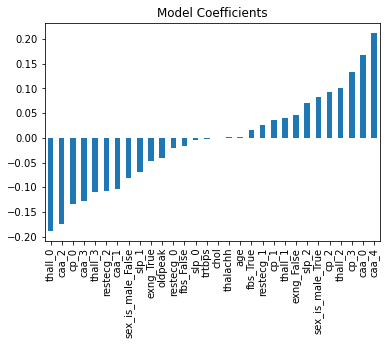

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.11066672038265273
CV Score: 0.16549476915856057


<AxesSubplot:title={'center':'Model Coefficients'}>

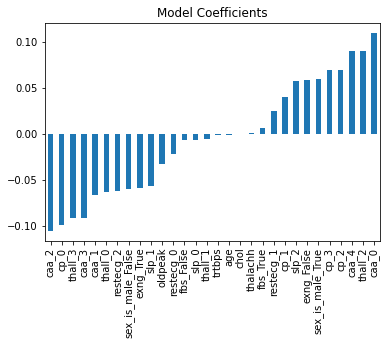

In [44]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.20401882542911154
CV Score: 0.2969861505612854


<AxesSubplot:title={'center':'Model Coefficients'}>

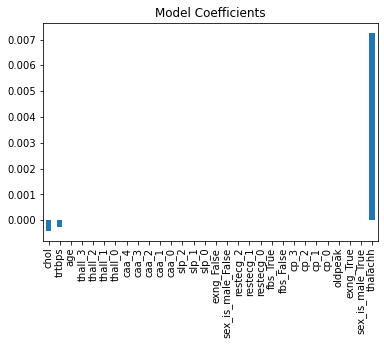

In [45]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
CV Score: 0.34316939890710374


<AxesSubplot:title={'center':'Feature Importance'}>

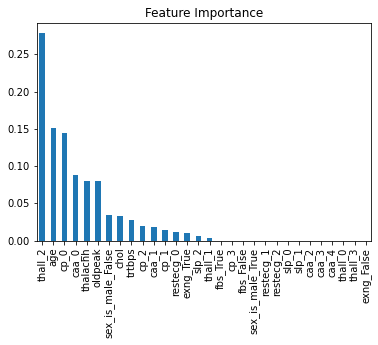

In [46]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.0188990099009901
CV Score: 0.184175868852459


<AxesSubplot:title={'center':'Feature Importance'}>

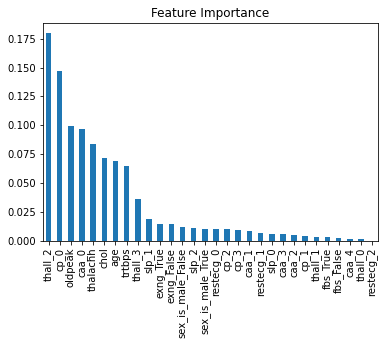

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.0
CV Score: 0.23120081967213107


<AxesSubplot:title={'center':'Feature Importance'}>

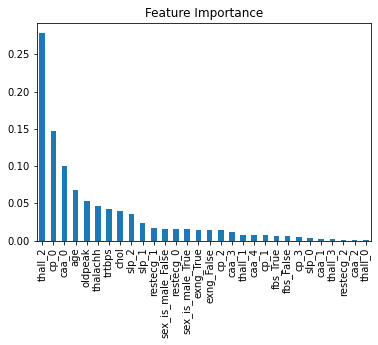

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [49]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
print(linear_regressor.intercept_)

0.33750622733268737


In [51]:
y_pred_lin = linear_regressor.predict(X_test)
df_pred_lin = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

In [52]:
df_pred_lin.to_csv('prediction_linear.csv')

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

Mean Absolute Error: 0.27307280878249107
Mean Squared Error: 0.11817108321292552
Root Mean Squared Error: 0.3437602117943924


In [54]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_lin)

0.5210080603101352

In [70]:
linear_regressor.score(X_test, y_pred_lin)

1.0

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [56]:
print(logistic_regressor.intercept_)

[-0.06249052]


In [57]:
y_pred_log = logistic_regressor.predict(X_test)

In [58]:
df_pred_log = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})

In [59]:
df_pred_log.to_csv('prediction_logistic.csv')

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
confusion_matrix(y_test, logistic_regressor.predict(X_test))

array([[23,  4],
       [ 3, 31]])

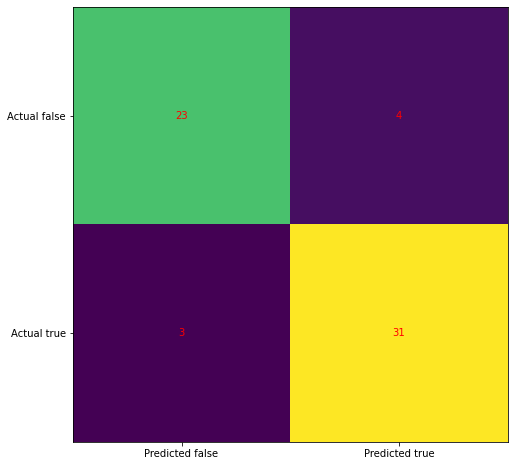

In [64]:
cm = confusion_matrix(y_test, logistic_regressor.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted false', 'Predicted true'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual false', 'Actual true'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [65]:
print(classification_report(y_test, logistic_regressor.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.85      0.87        27
        True       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

